# Project: PCA
# By: Krishna Kant Kaushal
# Python version used: Python 3.7.3

🥏Case Study Description:

    The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, 
    using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different
    angles.
    Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 
    and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that 
    the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult
    to distinguish between the cars.
    The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features
    extracted from the silhouette. The vehicle may be viewed from one of many different angles.

🥏Important steps:
    
    1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers
    2. Understanding the attributes - Find relationship between different attributes (Independent variables) 
    and choose carefully which all attributes have to be a part of the analysis and why.
    3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more 
    than 95% of the variance)
    4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf)
    and find out the best hyper parameters and do cross validation to find the accuracy.

### Importing the necessary libraries

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# To enable plotting graph in jupyter notebook
%matplotlib inline

In [ ]:
# for importing data and data analysis
import pandas as pd
pd.set_option('display.max_columns', None)

# for arrays and matrices
import numpy as np 

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for scaling
from scipy.stats import zscore

# for PCA/feature extraction
from sklearn.decomposition import PCA

# For splitting data in train and test sets
from sklearn.model_selection import train_test_split

# for Support Vector Machine model building
from sklearn import svm

# calculate accuracy measures and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix 

# for Grid Search
from sklearn.model_selection import GridSearchCV

##### Reading the data as a data frame

In [ ]:
vData = pd.read_csv('vehicle.csv')
vData.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

##### Shape of Dataset

In [ ]:
vData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [ ]:
print('There are %s rows and %s columns in the dataset.' %(vData.shape[0], vData.shape[1]))

print('\nBelow are the dataset columns:')
for i, item in enumerate(vData.columns,1):
    print(i, '. ' + item, sep='',end='\n')

There are 846 rows and 19 columns in the dataset.

Below are the dataset columns:
1. compactness
2. circularity
3. distance_circularity
4. radius_ratio
5. pr.axis_aspect_ratio
6. max.length_aspect_ratio
7. scatter_ratio
8. elongatedness
9. pr.axis_rectangularity
10. max.length_rectangularity
11. scaled_variance
12. scaled_variance.1
13. scaled_radius_of_gyration
14. scaled_radius_of_gyration.1
15. skewness_about
16. skewness_about.1
17. skewness_about.2
18. hollows_ratio
19. class


In [ ]:
vDataAttr = vData.drop('class', axis=1)

# 1. Data pre-processing - understand the data and treat missing values

##### Lets Check  presence of missing values

In [ ]:
print('Number of Missing Values by Attributes:\n')
print(vDataAttr.isnull().sum())

Number of Missing Values by Attributes:

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64


##### As there are many attributes having missing values. Lets replace them with the median of the respective attribute.

In [ ]:
vDataAttr.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

##### Lets calculate Lambda function now and using that fill NAN values of the attributes with respective attribute median.

In [ ]:
medianFiller = lambda x: x.fillna(x.median())
vDataAttr = vDataAttr.apply(medianFiller, axis=0)
vDataAttr.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

##### As the data is processed now, lets get the dataset including the classifier column and draw boxplots.

In [ ]:
vDataTreated = vDataAttr
vDataTreated['class'] = vData.loc[:,'class']
vDataTreated.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

##### Boxplots

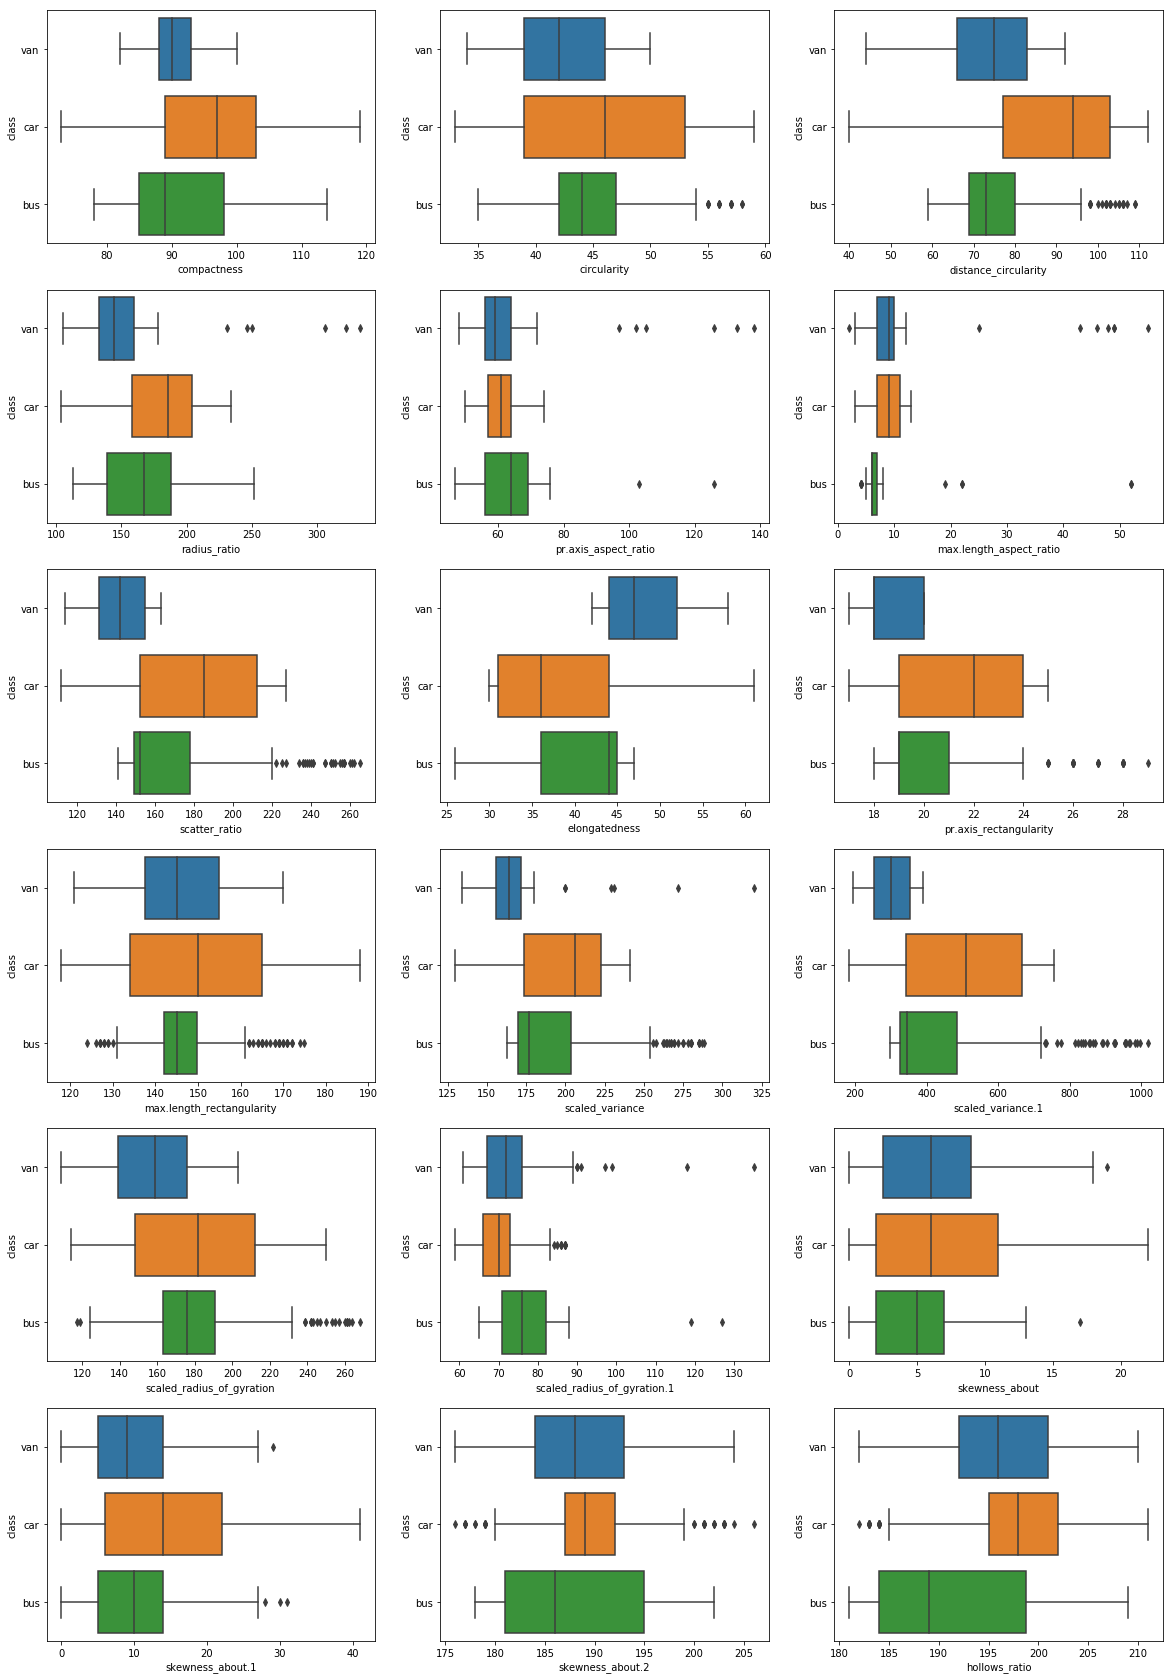

In [ ]:
f, axes = plt.subplots(6,3,figsize=(20, 30), sharex=False)
sns.boxplot(x = "compactness", y = "class", data = vDataTreated, ax=axes[0,0])
sns.boxplot(x = "circularity", y = "class", data = vDataTreated, ax=axes[0,1])
sns.boxplot(x = "distance_circularity", y = "class", data = vDataTreated, ax=axes[0,2])
sns.boxplot(x = "radius_ratio", y = "class", data = vDataTreated, ax=axes[1,0])
sns.boxplot(x = "pr.axis_aspect_ratio", y = "class", data = vDataTreated, ax=axes[1,1])
sns.boxplot(x = "max.length_aspect_ratio", y = "class", data = vDataTreated, ax=axes[1,2])

sns.boxplot(x = "scatter_ratio", y = "class", data = vDataTreated, ax=axes[2,0])
sns.boxplot(x = "elongatedness", y = "class", data = vDataTreated, ax=axes[2,1])
sns.boxplot(x = "pr.axis_rectangularity", y = "class", data = vDataTreated, ax=axes[2,2])
sns.boxplot(x = "max.length_rectangularity", y = "class", data = vDataTreated, ax=axes[3,0])
sns.boxplot(x = "scaled_variance", y = "class", data = vDataTreated, ax=axes[3,1])
sns.boxplot(x = "scaled_variance.1", y = "class", data = vDataTreated, ax=axes[3,2])

sns.boxplot(x = "scaled_radius_of_gyration", y = "class", data = vDataTreated, ax=axes[4,0])
sns.boxplot(x = "scaled_radius_of_gyration.1", y = "class", data = vDataTreated, ax=axes[4,1])
sns.boxplot(x = "skewness_about", y = "class", data = vDataTreated, ax=axes[4,2])
sns.boxplot(x = "skewness_about.1", y = "class", data = vDataTreated, ax=axes[5,0])
sns.boxplot(x = "skewness_about.2", y = "class", data = vDataTreated, ax=axes[5,1])
sns.boxplot(x = "hollows_ratio", y = "class", data = vDataTreated, ax=axes[5,2])

### ** There are few outliers here - mostly for 'bus' and 'van' classes and more so for 'bus' than for 'van'. I would expect the model to have more inaccurate predictions for 'bus' and 'van' classes than the 'car' class. We will see that in a bit. **

In [ ]:
vDataTreated.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

##### Lets drop the classifier column and draw pairplot of the attributes

In [ ]:
vDataAttr = vDataTreated.drop('class', axis=1)
vDataAttr.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

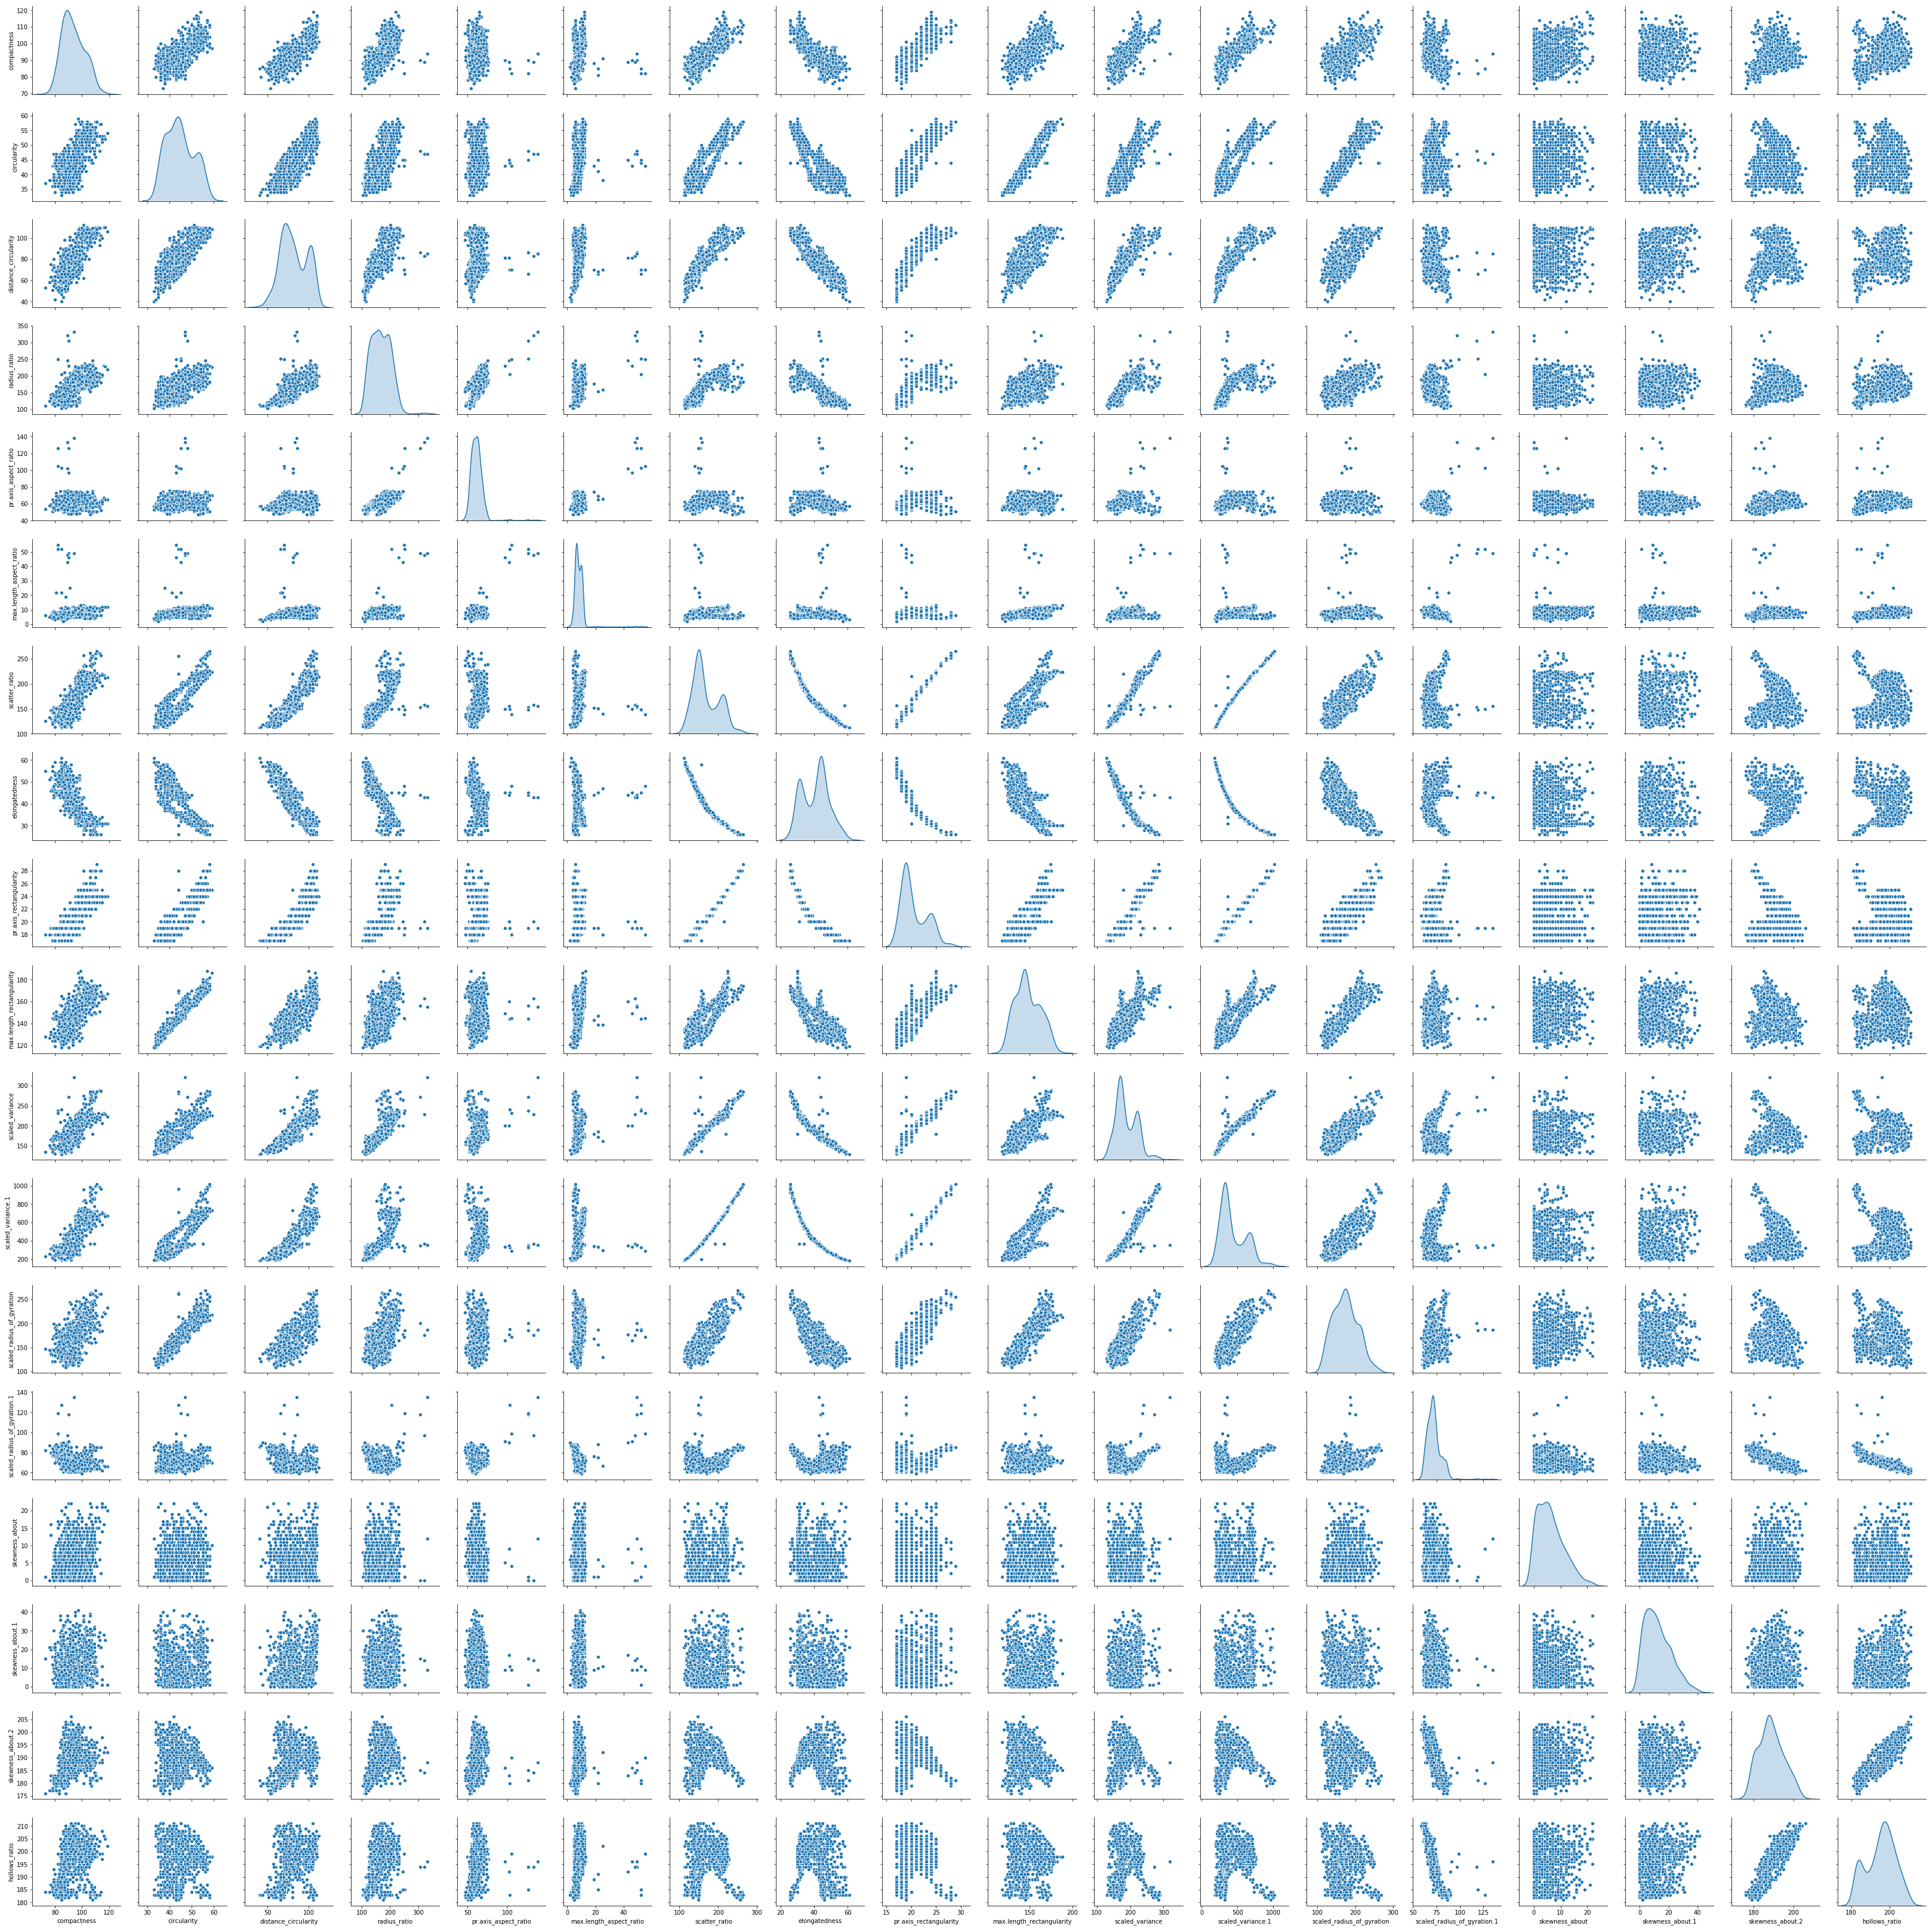

In [ ]:
sns.pairplot(vDataAttr, diag_kind='kde')

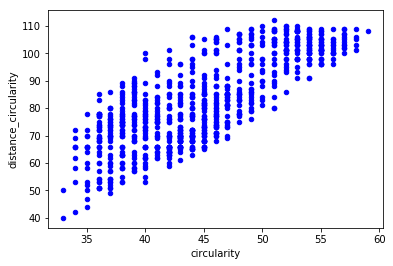

In [ ]:
vDataAttr.plot(kind='scatter',x='circularity',y='distance_circularity',color='blue')
plt.show()

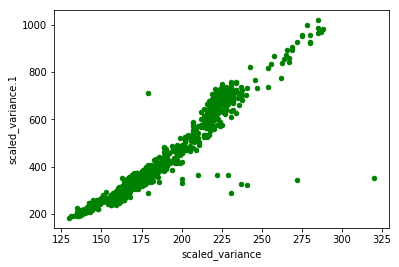

In [ ]:
vDataAttr.plot(kind='scatter' ,x='scaled_variance',y='scaled_variance.1',color='green')
plt.show()

In [ ]:
vDataAttr = vDataAttr.drop('scaled_variance', axis=1)
vDataAttr.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0              379.0                      184.0                         70.0   
1              330.0                      158.0                         72.0   
2              635.0                      220.0                         73.0   
3              309.0                      127.0                         63.0   
4              325.0                      188.0                        127.0   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  
0             6.0              16.0             187.0            197  
1             9.0              14.0             189.0            199  
2            14.0               9.0             188.0            196  
3             6.0              10.0             199.0            207  
4             9.0              11.0             180.0            183

# 3. Use PCA and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) 

Lets do Scaling using zscore to negate the impact of different measurement units for attributes

In [ ]:
vDataScalled = vDataAttr.apply(zscore)

Now lets get co-variance matrix

In [ ]:
covMat = np.cov(vDataScalled, rowvar = False)
print(covMat)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.81497566  0.58593517
  -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.83693508  0.92691166
   0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.88706577  0.70660663
  -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.71928618  0.53700678
  -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969786  0.1270594   0.08929427  0.12211524
   0.153

In [ ]:
pca = PCA(n_components = 17)

In [ ]:
pca.fit(vDataScalled)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_)

[8.51700299e+00 3.00191872e+00 1.89707618e+00 1.16229863e+00
 9.17260431e-01 5.09088772e-01 3.53274201e-01 2.21411692e-01
 1.45402315e-01 9.00304161e-02 6.61010455e-02 4.48581962e-02
 3.51798197e-02 2.63079553e-02 1.94998510e-02 1.04418214e-02
 2.96530613e-03]


Text(0.5, 0, 'Eigen value')

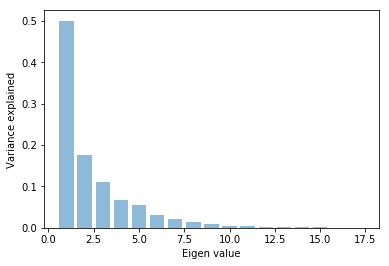

In [ ]:
plt.bar(list(range(1,18)),pca.explained_variance_ratio_, alpha=.5, align='center')
plt.ylabel('Variance explained')
plt.xlabel('Eigen value')

Text(0.5, 0, 'Eigen value')

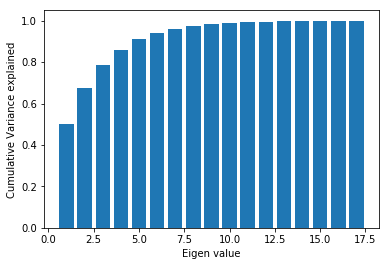

In [ ]:
plt.bar(list(range(1,18)),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Cumulative Variance explained')
plt.xlabel('Eigen value')

##### Dimensionality reduction

In [ ]:
pca11 = PCA(n_components = 11)
pca11.fit(vDataScalled)
print(pca11.explained_variance_)
Xpca11 = pca11.transform(vDataScalled)
Xpca11

[8.51700299 3.00191872 1.89707618 1.16229863 0.91726043 0.50908877
 0.3532742  0.22141169 0.14540231 0.09003042 0.06610105]


array([[ 4.85056139e-01, -1.82006993e-01,  1.04224497e+00, ...,
        -8.69732213e-01,  1.58974982e-01, -5.73870914e-04],
       [-1.47153668e+00, -4.25432313e-01, -3.70474895e-01, ...,
         1.28886279e-01, -9.52048930e-02,  5.09749032e-01],
       [ 3.60748922e+00,  2.41820383e-01,  1.22355444e-01, ...,
        -2.75863427e-01, -4.63237826e-01,  2.88669717e-01],
       ...,
       [ 4.64741001e+00,  6.21748089e-02,  5.74686817e-01, ...,
        -5.23273927e-01,  5.66871052e-01, -3.30243881e-01],
       [-3.11201870e+00, -1.04599878e+00, -4.00457600e-01, ...,
        -2.38802970e-01, -8.70672329e-01, -1.03650206e-02],
       [-4.51232991e+00,  2.91751786e-01, -5.95455387e-01, ...,
        -4.49233808e-01, -2.60219244e-01,  1.65488950e-01]])

In [ ]:
vDataScalled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 17 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio                  846 non-null float64
dtypes: flo

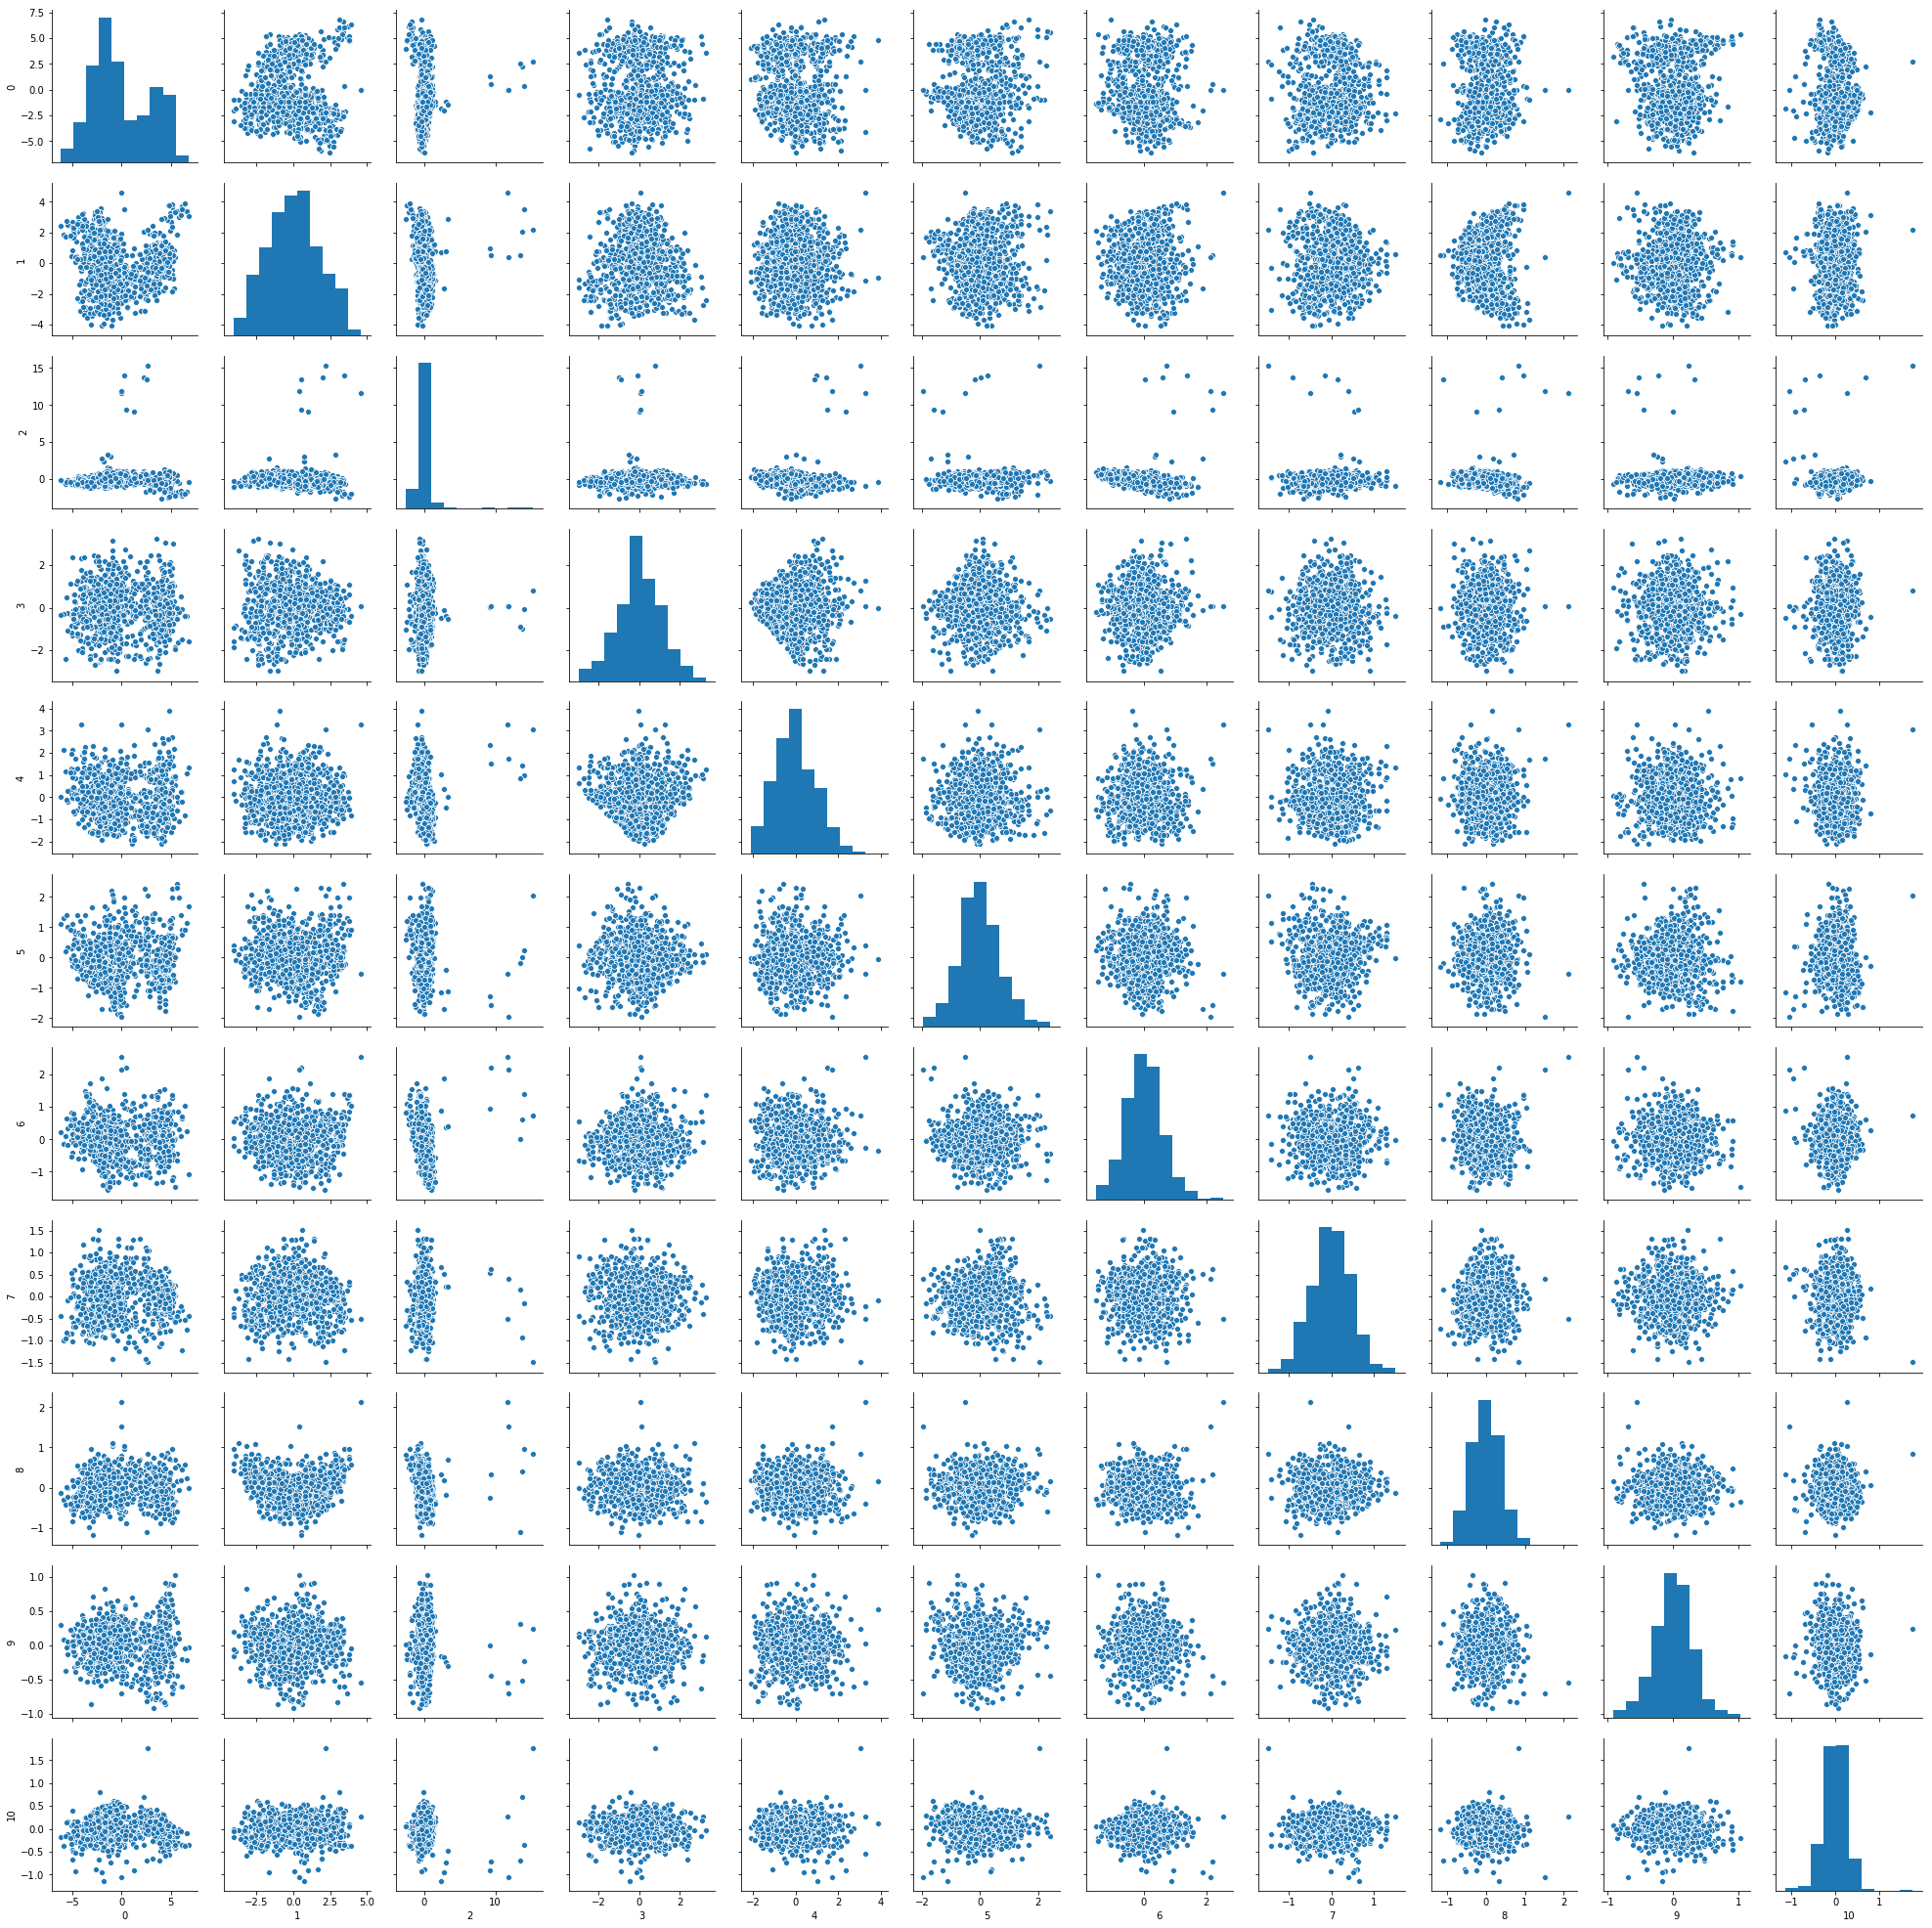

In [ ]:
sns.pairplot(pd.DataFrame(Xpca11))

In [ ]:
X, y = Xpca11, vData.loc[:,'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 108)

In [ ]:
model11 = svm.SVC(gamma=0.025, C=3, kernel='linear')
model11.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
model11.score(X_test, y_test)

0.9291338582677166

In [ ]:
predictions = model11.predict(X_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         bus       0.85      0.91      0.88        58
         car       0.96      0.90      0.93       121
         van       0.95      0.99      0.97        75

   micro avg       0.93      0.93      0.93       254
   macro avg       0.92      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [ ]:
y_pred = model11.predict(X_test)
pd.set_option('display.max_columns', 4)
pd.crosstab(y_pred, y_test)

class  bus  car  van
row_0               
bus     53    9    0
car      4  109    1
van      1    3   74

### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. 

In [ ]:
param_grid = {'C': [0.01, 0.05, 0.5, 1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
gridSearch = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 

In [ ]:
gridSearch.fit(X_train, y_train) 

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5175879396984925, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5228426395939086, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5204081632653061, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.8040201005025126, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.7766497461928934, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.7397959183673469, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ..................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.5228426395939086, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.5204081632653061, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=0.8040201005025126, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=0.7766497461928934, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=0.7397959183673469, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5175879396984925, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5228426395939086, total=   0.0s
[CV] C=0.01, gamm

[CV]  C=0.5, gamma=0.01, kernel=linear, score=0.9132653061224489, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.5, gamma=0.001, kernel=rbf, score=0.5175879396984925, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.5, gamma=0.001, kernel=rbf, score=0.5228426395939086, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.5, gamma=0.001, kernel=rbf, score=0.5204081632653061, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV]  C=0.5, gamma=0.001, kernel=linear, score=0.8944723618090452, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV]  C=0.5, gamma=0.001, kernel=linear, score=0.9390862944162437, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV]  C=0.5, gamma=0.001, kernel=linear, score=0.9132653061224489, total=   0.0s
[CV] C=0.5, gamma

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.4s finished
/Users/kk/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [ ]:
print(gridSearch.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
print(gridSearch.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [ ]:
grid_predictions = gridSearch.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

         bus       0.98      0.97      0.97        58
         car       0.99      0.96      0.97       121
         van       0.93      0.99      0.95        75

   micro avg       0.97      0.97      0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



All of the scores are 93% or more which is pretty decent. It all possible due to GridSearch which is great tool.

In [ ]:
model_final = svm.SVC(gamma=0.1, C=1, kernel='rbf')  
model_final.fit(X_train , y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
y_pred = model_final.predict(X_test)
pd.set_option('display.max_columns', 4)
pd.crosstab(y_pred, y_test)

class  bus  car  van
row_0               
bus     56    0    1
car      1  116    0
van      1    5   74

The model is able to predict 'car' class better than 'bus' class or 'van' class.

In [ ]:
model_final.score(X_test, y_test)

0.968503937007874

~96.85% is really good score. This could be possible again due to GridSearch.

# Conclusion:

1. Here is our model:
    SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
  
2. The model score is: ~96.85%
3. The best parameters for the SVM are:
    {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
4. The final model is able to predict 'car' class (115/116) far better than 'bus' class (55/56) or 
    'van' class (68/74) as we speculated after analysing boxplot.